In [1]:
from game import *
from random_player import RandomPlayer
from heuristic_player import *
import torch

In [2]:
randomPlayer = RandomPlayer()
heuristicPlayer = HeuristicPlayer()
aggressivePlayer = AggressiveHeuristicPlayer()
pacificPlayer = PacificHeuristicPlayer()

In [3]:
board, pieces = init_game()
playerA = RandomPlayer()
playerB = RandomPlayer()
piece_idx = 0  # exploiting symmetry
for turn in range(8):
    if turn % 2 == 0:
        piece = pieces[1:, piece_idx]
        place_i, place_j = playerA.place(board, pieces, piece)
        board[0, place_i, place_j] = 1
        board[1:, place_i, place_j] = piece
        pieces[0, piece_idx] = 0
        if checkAlign(board):
            print("A wins")
        piece_idx = playerA.give(board, pieces)
    else:
        piece = pieces[1:, piece_idx]
        place_i, place_j = playerB.place(board, pieces, piece)
        board[0, place_i, place_j] = 1
        board[1:, place_i, place_j] = piece
        pieces[0, piece_idx] = 0
        if checkAlign(board):
            print("B wins")
        if turn == 15:
            print("Draw")
        piece_idx = playerB.give(board, pieces)

plotBoard(board)
plotPieces(pieces)

 83a
1   
d f0
   6

*0* *1*  2  *3*  4   5  *6*  7  *8*  9  *a*  b   c  *d*  e  *f* 


In [4]:
print(full_game(randomPlayer, randomPlayer, False))

B


In [5]:
A_wins, B_wins, draws = multiple_games(randomPlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 5, B_wins: 5, draws: 0


In [6]:
A_wins, B_wins, draws = multiple_games(heuristicPlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 9, B_wins: 1, draws: 0


In [7]:
A_wins, B_wins, draws = multiple_games(aggressivePlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 10, B_wins: 0, draws: 0


In [8]:
A_wins, B_wins, draws = multiple_games(pacificPlayer, randomPlayer, 10)
print(f'A_wins: {A_wins}, B_wins: {B_wins}, draws: {draws}')

A_wins: 10, B_wins: 0, draws: 0


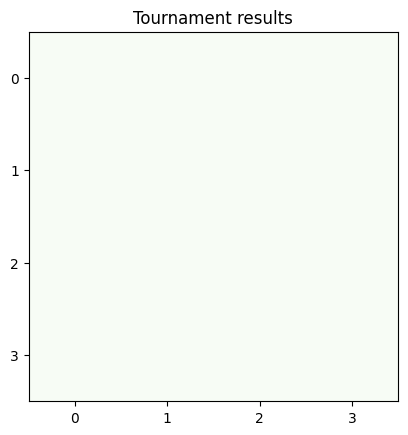

In [9]:
players = [randomPlayer, heuristicPlayer, aggressivePlayer, pacificPlayer]
wins, losts, draws = tournament(players, 10)
plot_tournament(wins, losts, draws)

In [30]:
n_games = 1000
n_players = len(players)
wins = np.zeros((n_players, n_players), dtype=int)
losts = np.zeros((n_players, n_players), dtype=int)
draws = np.zeros((n_players, n_players), dtype=int)
for i in range(n_players):
    for j in range(n_players):
        wins[i, j], losts[i, j], draws[i, j] \
            = multiple_games(players[i], players[j], n_games)

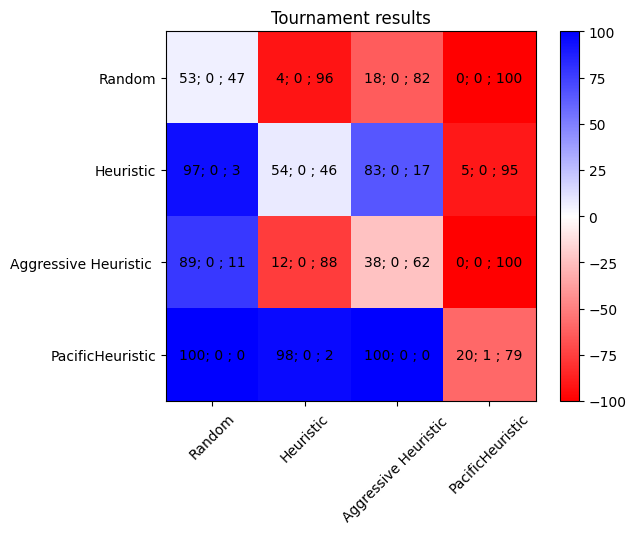

In [35]:
# fig, ax = plt.subplots()
plt.imshow(wins-losts, cmap='bwr_r', vmin=-n_games, vmax=n_games)
for i in range(n_players):
    for j in range(n_players):
        plt.text(j,i, f"{wins[i,j]}; {draws[i,j]} ; {losts[i,j]}", ha='center',va='center')
plt.xticks(np.arange(n_players), [player.__str__().replace("Player", "") for player in players])
plt.yticks(np.arange(n_players), [player.__str__().replace("Player", "") for player in players])
plt.title("Tournament results")
plt.xticks(rotation=45)
plt.colorbar()
plt.show()

In [10]:
losts

array([[ 3., 10.,  6., 10.],
       [ 0.,  6.,  1., 10.],
       [ 0.,  9.,  5., 10.],
       [ 1.,  0.,  0.,  7.]])

In [11]:
draws

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])